In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

C:\Users\Gabri\AppData\Local\Temp\ipykernel_18104\3910161231.py:14: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [3]:
import pandas as pd
  
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
print(housing)


       longitude  latitude  ...  median_house_value  ocean_proximity
0        -122.23     37.88  ...            452600.0         NEAR BAY
1        -122.22     37.86  ...            358500.0         NEAR BAY
2        -122.24     37.85  ...            352100.0         NEAR BAY
3        -122.25     37.85  ...            341300.0         NEAR BAY
4        -122.25     37.85  ...            342200.0         NEAR BAY
...          ...       ...  ...                 ...              ...
20635    -121.09     39.48  ...             78100.0           INLAND
20636    -121.21     39.49  ...             77100.0           INLAND
20637    -121.22     39.43  ...             92300.0           INLAND
20638    -121.32     39.43  ...             84700.0           INLAND
20639    -121.24     39.37  ...             89400.0           INLAND

[20640 rows x 10 columns]


In [4]:
#mostra as informações iniciais do data base
print(housing.head())


   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]


In [5]:
#mostra os tipos das colunas, quantidades , memória usada e etc..
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [6]:
#mostra os tipos de dados de uma respectiva coluna , no caso da coluna categória ocean_proximity
print(housing["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [7]:
#mas pode ser de uma não categória também
print(housing["total_rooms"].value_counts())

total_rooms
1527.0    18
1613.0    17
1582.0    17
2127.0    16
2053.0    15
          ..
4528.0     1
166.0      1
9807.0     1
5593.0     1
4242.0     1
Name: count, Length: 5926, dtype: int64


In [8]:
#mostra a descrição resumida de cada campo
print(housing.describe())

          longitude      latitude  ...  median_income  median_house_value
count  20640.000000  20640.000000  ...   20640.000000        20640.000000
mean    -119.569704     35.631861  ...       3.870671       206855.816909
std        2.003532      2.135952  ...       1.899822       115395.615874
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.800000     33.930000  ...       2.563400       119600.000000
50%     -118.490000     34.260000  ...       3.534800       179700.000000
75%     -118.010000     37.710000  ...       4.743250       264725.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]


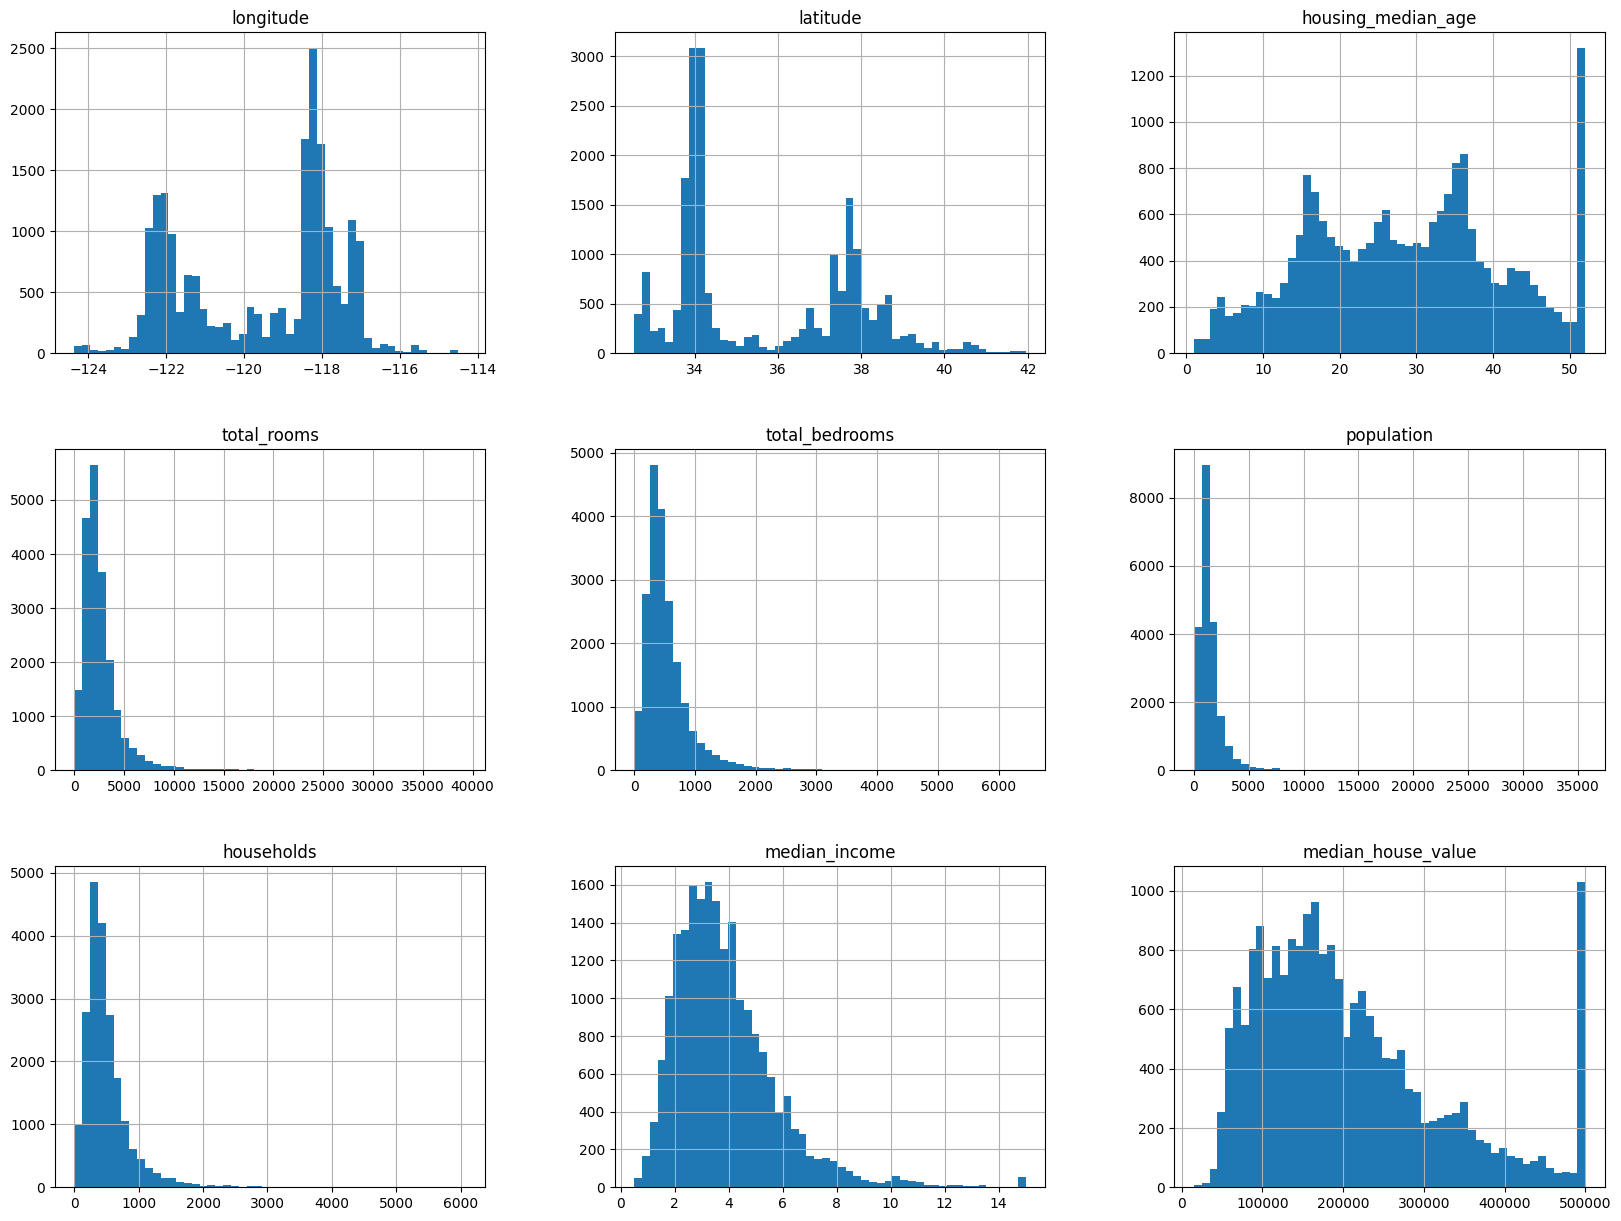

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
import numpy as np
from zlib import crc32

#Essa função serve para dividir o dataset em treino e teste de forma fixa, 
# garantindo que os mesmos registros sempre fiquem no mesmo conjunto, 
# mesmo se você rodar o código várias vezes ou atualizar os dados. 
#Cria index usando a coluna latitude e longitude (Id)

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data,test_ratio,id_column): 
    ids = data[id_column] 
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))        
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"index")

print(train_set)

housing_with_id = housing.reset_index()
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"id")

       index  longitude  ...  median_house_value  ocean_proximity
0          0    -122.23  ...            452600.0         NEAR BAY
1          1    -122.22  ...            358500.0         NEAR BAY
3          3    -122.25  ...            341300.0         NEAR BAY
4          4    -122.25  ...            342200.0         NEAR BAY
6          6    -122.25  ...            299200.0         NEAR BAY
...      ...        ...  ...                 ...              ...
20635  20635    -121.09  ...             78100.0           INLAND
20636  20636    -121.21  ...             77100.0           INLAND
20637  20637    -121.22  ...             92300.0           INLAND
20638  20638    -121.32  ...             84700.0           INLAND
20639  20639    -121.24  ...             89400.0           INLAND

[16512 rows x 11 columns]


Aqui você cria um ID fixo para cada linha (ex.: usando longitude e latitude).
Depois aplica um hash (crc32) nesse ID.
Esse hash garante que a mesma linha sempre caia no mesmo conjunto (treino ou teste), mesmo se você rodar o código várias vezes ou atualizar o dataset.
Vantagem: se você receber novos dados futuramente, os registros antigos não mudam de conjunto → consistência garantida.
Desvantagem: é mais trabalhoso, precisa definir bem a coluna id.

In [11]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


train_set , test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(train_set,test_set)

       longitude  latitude  ...  median_house_value  ocean_proximity
14196    -117.03     32.71  ...            103000.0       NEAR OCEAN
8267     -118.16     33.77  ...            382100.0       NEAR OCEAN
17445    -120.48     34.66  ...            172600.0       NEAR OCEAN
14265    -117.11     32.69  ...             93400.0       NEAR OCEAN
2271     -119.80     36.78  ...             96500.0           INLAND
...          ...       ...  ...                 ...              ...
11284    -117.96     33.78  ...            229200.0        <1H OCEAN
11964    -117.43     34.02  ...             97800.0           INLAND
5390     -118.38     34.03  ...            222100.0        <1H OCEAN
860      -121.96     37.58  ...            283500.0        <1H OCEAN
15795    -122.42     37.77  ...            325000.0         NEAR BAY

[16512 rows x 10 columns]        longitude  latitude  ...  median_house_value  ocean_proximity
20046    -119.01     36.06  ...             47700.0           INLAND
3024   

O scikit-learn sorteia linhas aleatoriamente para treino e teste.
O parâmetro random_state=42 serve para fixar a semente do gerador de números aleatórios → sempre a mesma divisão se você rodar de novo com o mesmo dataset.
Vantagem: simples, rápido, pronto para usar.
Desvantagem: se você adicionar linhas novas no dataset, a divisão pode mudar para os registros antigos → ou seja, um mesmo dado pode “trocar de lado” entre treino e teste ao longo do tempo.

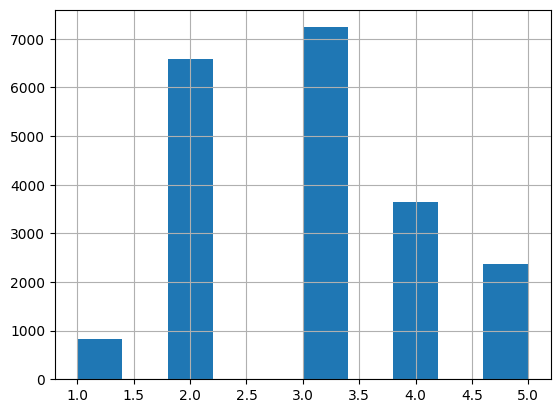

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins =[0.,1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])

housing["income_cat"].hist()

plt.show()

Esse bloco de código transforma a renda em categorias e mostra visualmente quantas casas estão em cada faixa.
É útil para amostrar os dados antes de dividir treino/teste, 
principalmente se você quer fazer amostragem estratificada (stratified sampling).

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size= 0.2, random_state=42)
for train_index , test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


Esse código divide os dados em treino (80%) e teste (20%), garantindo que a variável income_cat mantenha a mesma distribuição nos dois conjuntos. 
Isso evita que o modelo aprenda ou seja avaliado de forma enviesada caso uma categoria fique desbalanceada.

Qual é melhor Random ou estratificada?

Depende do objetivo e do tipo de dado, mas na prática:

🔹 Random (aleatória)

Como funciona: divide os dados em treino e teste escolhendo linhas de forma totalmente aleatória.

Problema: se você tiver uma coluna importante e desbalanceada (ex: classe rara ou categorias com proporções diferentes), pode acontecer de no conjunto de teste quase não aparecer essa categoria → isso atrapalha a avaliação do modelo.

Exemplo:

Dataset de pacientes: 90% não fumantes, 10% fumantes.

Se dividir aleatoriamente, o conjunto de teste pode cair só com 5% de fumantes.

O modelo será testado em uma distribuição diferente da real.

🔹 Estratificada

Como funciona: divide os dados mantendo a mesma proporção de uma variável-chave (geralmente a variável alvo ou uma variável correlacionada).

Vantagem: garante que treino e teste reflitam a distribuição real dos dados.

Exemplo:

Se no dataset completo 10% são fumantes, no treino e no teste também será ~10% fumantes.

Isso dá uma avaliação mais justa e realista do modelo.

✅ Conclusão

Se seus dados têm categorias desbalanceadas (como classes em classificação ou faixas de renda no seu exemplo), estratificação é a melhor escolha.

Se os dados já são bem distribuídos, a divisão aleatória pode ser suficiente.

Na prática em Machine Learning, o mais comum é usar estratificação em relação à variável alvo (y).
No exemplo do housing, a variável income_cat foi criada justamente para servir de proxy do alvo e garantir que renda (um fator importante para prever preços de casas) fique bem representada.

Criaremos uma cópia dos dados de treinamento , para manipularmos daqui em diante , sem alterá-los (fuçar)

In [ ]:
housing = strat_train_set.copy()


       longitude  latitude  ...  ocean_proximity  income_cat
12655    -121.46     38.52  ...           INLAND           2
15502    -117.23     33.09  ...       NEAR OCEAN           5
2908     -119.04     35.37  ...           INLAND           2
14053    -117.13     32.75  ...       NEAR OCEAN           2
20496    -118.70     34.28  ...        <1H OCEAN           3
...          ...       ...  ...              ...         ...
15174    -117.07     33.03  ...        <1H OCEAN           4
12661    -121.42     38.51  ...           INLAND           2
19263    -122.72     38.44  ...        <1H OCEAN           3
19140    -122.70     38.31  ...        <1H OCEAN           3
19773    -122.14     39.97  ...           INLAND           3

[16512 rows x 11 columns]


Criaremos uma diagrama de dispersão baseado nas informações de latitude e longitude

<Axes: xlabel='longitude', ylabel='latitude'>

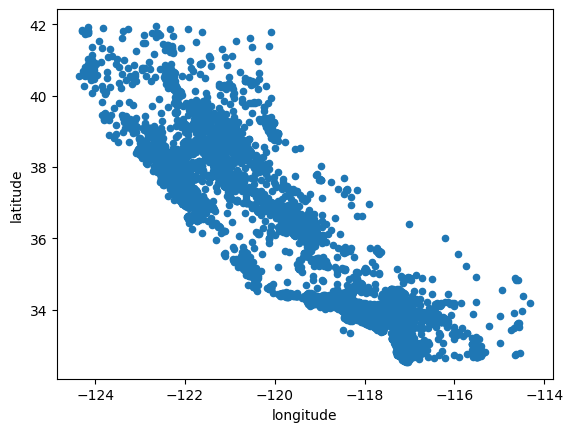

In [23]:
housing.plot(kind="scatter", x="longitude", y= "latitude")

Bom , olhando assim fica difícil identificar algum padrão. Para isso , iremos definir a opção "alpha" para "0.1", assim facilitando a visualização
dos locais onde há uma alta densidade de pontos de dados.

<Axes: xlabel='latitude', ylabel='longitude'>

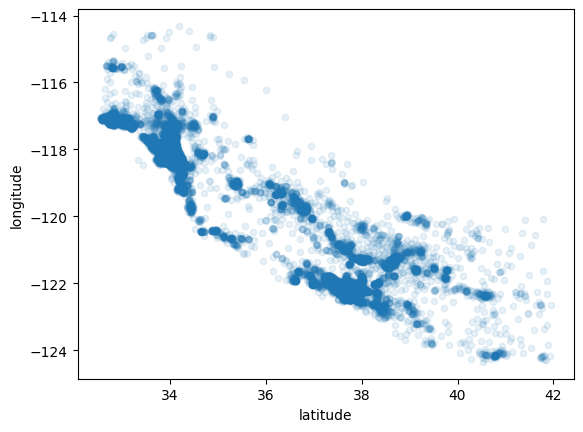

In [28]:
housing.plot(kind="scatter", x="latitude", y = "longitude" , alpha = 0.1)